In [1]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [2]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e does not exist


In [3]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [4]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

In [5]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

#print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [6]:
'''# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 
    '''


'# Generate trajectory\n\n#startpos = np.array([0, 0, 0])\nT0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision\nT1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])\ndt = 0.002 \nendTime = 0.3\nn = int(endTime/dt)\n\nif \'ctr\' not in locals():\n    ctr = np.array([])\n    times = np.array([])\n    startTime = 0\n    scalingX = 5000\n    scalingY = 2500\n    movementX = 0.4\n    movementY = 0.0\n\n\n\n    for i in tqdm(range(0, poi.shape[0]-1)):\n        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)\n        endTime = distance*0.05\n        n = int(endTime/dt)\n        T0.t[0] = movementX + poi[i, 0]/scalingX\n        T0.t[1] = movementY + poi[i, 1]/scalingY\n        T1.t[0] = movementX + poi[i+1, 0]/scalingX\n        T1.t[1] = movementY + poi[i+1, 1]/scalingY\n        trajectory = rtb.ctraj(T0, T1, n)\n        time = np.linspace(startT

[-1.47927351 -1.74426021 -2.02947213  2.202936    1.57079633  3.05006984]


""

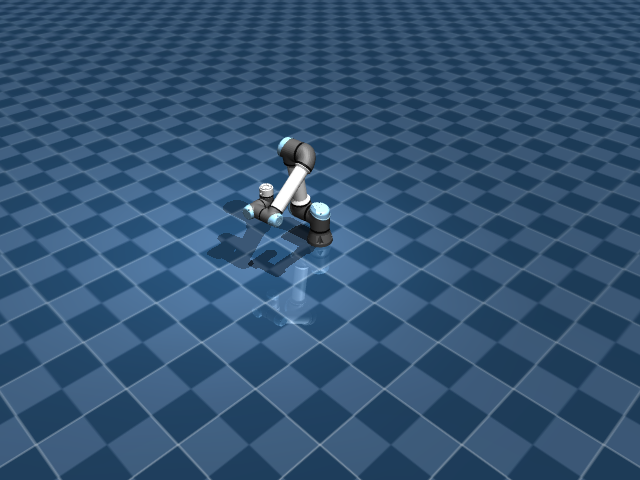

In [7]:
#Admittance_controller_using_torque_actuators.ipynb
# Use the inverse kinematics to make a start pose for the robot
initial_pose = np.array([0.3*np.sin(0)-0.1, 0.3*np.sin(0)*np.cos(0)-0.3, 0.1*np.sin(0)+0.5, 0.0, 0.0, 0.0])
T_target = SE3(initial_pose[0], initial_pose[1], initial_pose[2]) * sm.SE3.RPY([0, 0, 0])
sol = ur5e.invkin(T_target)
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
#[-1.47927366 -1.7442602  -2.02947217  2.20293603  1.57079633  3.05006999]


In [8]:
import numpy as np
import mujoco
from tqdm import tqdm
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Cartesian Admittance Control Parameters (Critically Damped)
# ------------------------------------------------------------------
# Virtual inertia (from the robot’s model) for translation and rotation:
M_diag = np.array([200.0, 200.0, 200.0, 15.0, 15.0, 15.0])  # [m_x, m_y, m_z, m_roll, m_pitch, m_yaw]
M = np.diag(M_diag)
K_trans = 1000.0
K_rot = 15.0
# For a critically damped second-order system (ζ = 1):
omega_n = np.sqrt(K_trans / M_diag[0])  # Natural frequency (rad/s)
# For translation (first 3 components):
#K_trans = M_diag[0]       
D_trans = 2 * M_diag[0] * omega_n         # e.g. 2*50*1 = 100
# For rotation (last 3 components): (keeping orientation constant)
K_rot = K_rot         # e.g. 12*1 = 12
D_rot = 2 * M_diag[3] * omega_n           # e.g. 2*12*1 = 24

# Assemble effective gain matrices (6x6 diagonal)
K_eff = np.diag([K_trans, K_trans, K_trans, K_rot, K_rot, K_rot])
D_eff = np.diag([D_trans, D_trans, D_trans, D_rot, D_rot, D_rot])

# ------------------------------------------------------------------
# Simulation Parameters
# ------------------------------------------------------------------
time_log = []
force_log = []  # external force (first 3 components)
duration = 25    # seconds (5s segments for force/torque profiles)
framerate = 30   # Hz
stepsize = ur5e.m.opt.timestep  # simulation time step
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Arrays for logging and video
frames = []
positions_as_quat = np.zeros((n_steps, 7))   # [x,y,z, qx,qy,qz,qw]
positions_as_rpy  = np.zeros((n_steps, 6))   # [x,y,z, roll,pitch,yaw]
velocities        = np.zeros((n_steps, 6))
forces            = np.zeros((n_steps, 6))
torques           = np.zeros((n_steps, 6))
tau_log           = np.zeros((n_steps, 6))
q_log             = np.zeros((n_steps, 6))
f_all_sensor      = np.zeros((n_steps, 3))
mu_all_sensor     = np.zeros((n_steps, 3))
f_all = np.zeros((n_steps, 3))
mu_all = np.zeros((n_steps, 3))

def skew_symmetric(v):
    return np.array([[    0,   -v[2],  v[1]],
                     [ v[2],       0, -v[0]],
                     [-v[1],   v[0],     0]])

def wrench_trans(wrench_A, T_A_B):
    R_A_B = T_A_B[:3, :3]
    p_A_B = T_A_B[:3, 3]
    adj = np.zeros((6,6))
    adj[:3, :3] = R_A_B
    adj[3:6, :3] = skew_symmetric(p_A_B) @ R_A_B
    adj[3:6, 3:6] = R_A_B
    return adj.T @ wrench_A

# ------------------------------------------------------------------
# Desired Cartesian Trajectory in the Compliance Frame
# ------------------------------------------------------------------
# The desired trajectory (in the compliance frame) is given by:
#   x(t) = 0.3 sin(t/3)
#   y(t) = 0.3 sin(t/3) cos(t/3)
#   z(t) = 0.1 sin(t)
#
# And then the target pose in world coordinates is:
#   desired_translation = computed translation + compliance_offset,
# with compliance_offset = [0, 0.1, 0.2]
compliance_offset = np.array([0.0, 0.1, 0.2])
compliance_frame = np.eye(4)
compliance_frame[:3, 3] = compliance_offset
print("Compliance Frame:\n", compliance_frame)

p_des = np.zeros((n_steps, 6))    # desired pose: [x, y, z, roll, pitch, yaw]
dp_des = np.zeros((n_steps, 6))
ddp_des = np.zeros((n_steps, 6))

for i in range(n_steps):
    t = i * stepsize
    # Compute desired translation in the compliance frame:
    x_des = 0.3 * np.sin(t/3)-0.1
    y_des = 0.3 * np.sin(t/3) * np.cos(t/3)-0.3
    z_des = 0.1 * np.sin(t)+0.5
    des_trans = np.array([x_des, y_des, z_des])# + compliance_offset
    # Orientation is fixed (zero rpy)
    des_orient = np.zeros(3)
    
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Compute derivatives (for translation; orientation derivatives are zero)
    dx_des = 0.3 * (1/3) * np.cos(t/3)
    ddx_des = -0.3 * (1/3)**2 * np.sin(t/3)
    # For y, note: y = 0.3 sin(t/3) cos(t/3) = 0.15 sin(2t/3)
    dy_des = 0.15 * (2/3) * np.cos(2*t/3)
    ddy_des = -0.15 * (2/3)**2 * np.sin(2*t/3)
    dz_des = 0.1 * np.cos(t)
    ddz_des = -0.1 * np.sin(t)
    des_trans_dot = np.array([dx_des, dy_des, dz_des])
    des_trans_ddot = np.array([ddx_des, ddy_des, ddz_des])
    
    dp_des[i, :] = np.concatenate((des_trans_dot, np.zeros(3)))
    ddp_des[i, :] = np.concatenate((des_trans_ddot, np.zeros(3)))
    

# ------------------------------------------------------------------
# External Force/Torque Profile
# ------------------------------------------------------------------
def get_external_wrench(t):
    # Returns a 6D wrench [f_x, f_y, f_z, mu_x, mu_y, mu_z]
    if t <= 5:
        return np.zeros(6)
    elif t <= 10:
        return np.array([1, 2, 3, 0, 0, 0])
    elif t <= 15:
        return np.zeros(6)
    elif t <= 20:
        return np.array([0, 0, 0, 1, 0.5, 1])
    elif t <= 25:
        return np.zeros(6)
    else:
        return np.zeros(6)

# ------------------------------------------------------------------
# Reset and Initialize Simulation
# ------------------------------------------------------------------
# Set the initial Cartesian pose (in world frame) for the robot.

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

#q_des = np.array([0.0, -1.57, 1.57, 0.0, 1.57, 0.0])  # Adjust these angles for your robot
#ur5e.d.qpos[:] = q_des


# ------------------------------------------------------------------
# Main Simulation Loop
# ------------------------------------------------------------------
progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get current Cartesian pose and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    
    # Compute the current Cartesian pose in the compliance frame:
    # (Subtract the compliance offset to get into the compliance frame)
    current_trans = tcp_pos.t #- compliance_offset
    current_orient = tcp_pos.rpy(order='xyz')
    current_pose = np.concatenate((current_trans, current_orient))
    
    # Get current Cartesian velocity (assumed computed in world frame; compliance offset derivative is zero)
    v_e = J @ ur5e.d.qvel
    
    # External wrench based on simulation time:
    t_current = ur5e.d.time
    f_ext = get_external_wrench(t_current)
    f_all_sensor[idx, :] = f_ext[:3]
    mu_all_sensor[idx, :] = f_ext[3:]
    f_ext = wrench_trans(f_ext, compliance_frame)
    f_all[idx, :] = f_ext[:3]
    mu_all[idx, :] = f_ext[3:]
    # Admittance control law in Cartesian space:
    acc_e = np.linalg.inv(M) @ ( f_ext - D_eff @ (v_e - dp_des[idx]) # Måske ikke f_ext 
                                   - K_eff @ (current_pose - p_des[idx]) 
                                   + ddp_des[idx] )
    
    # Map desired Cartesian acceleration to joint torques via the Jacobian transpose.
    tau = J.T @ ( M @ acc_e + D_eff @ (dp_des[idx] - v_e) + K_eff @ (p_des[idx] - current_pose) )
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # Log torque command and other data.
    tau_log[idx, :] = tau.copy()
    ur5e.d.ctrl[:] = tau
    
    # Log full pose in world coordinates:
    quat_e = r2q(tcp_pos.R)  # Function to convert rotation matrix to quaternion
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = M @ acc_e
    torques[idx] = tau
    time_log.append(t_current)
    force_log.append(f_ext[:3])
    q_log[idx, :] = ur5e.d.qpos.copy()
    
    # Capture video frames if desired.
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step simulation.
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

if showVideo:
    media.show_video(frames, fps=framerate)


Compliance Frame:
 [[1.  0.  0.  0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0.2]
 [0.  0.  0.  1. ]]


  4%|▍         | 1.1060000000000008/25 [00:01<00:38,  1.62s/it] 

KeyboardInterrupt: 

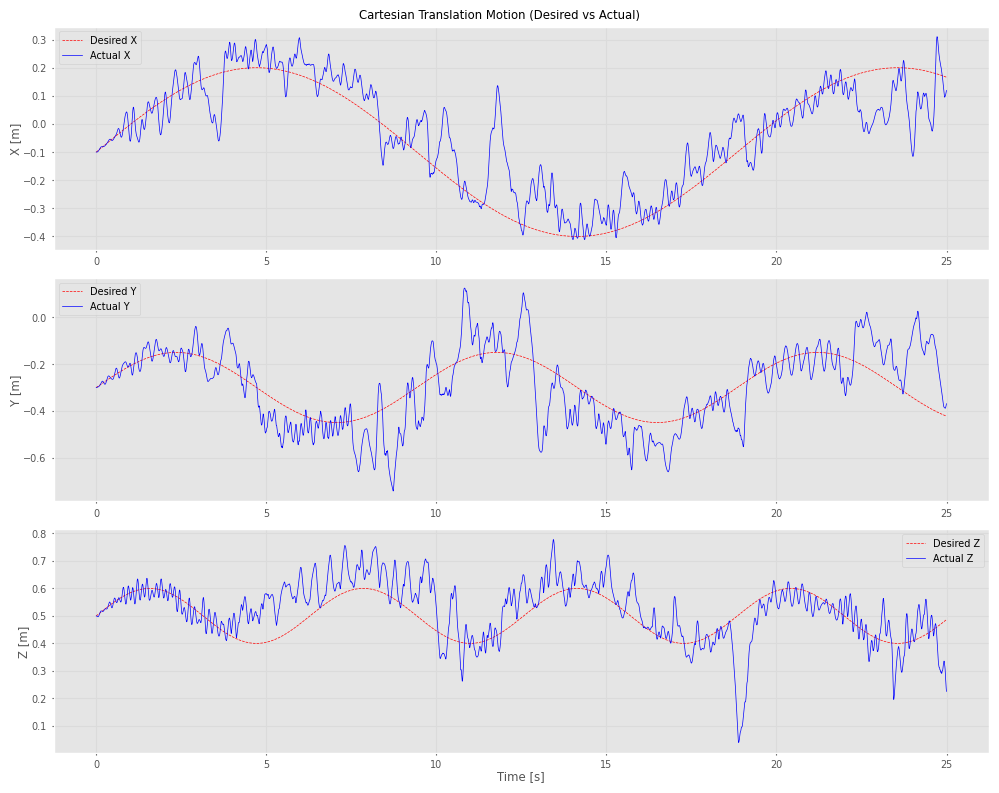

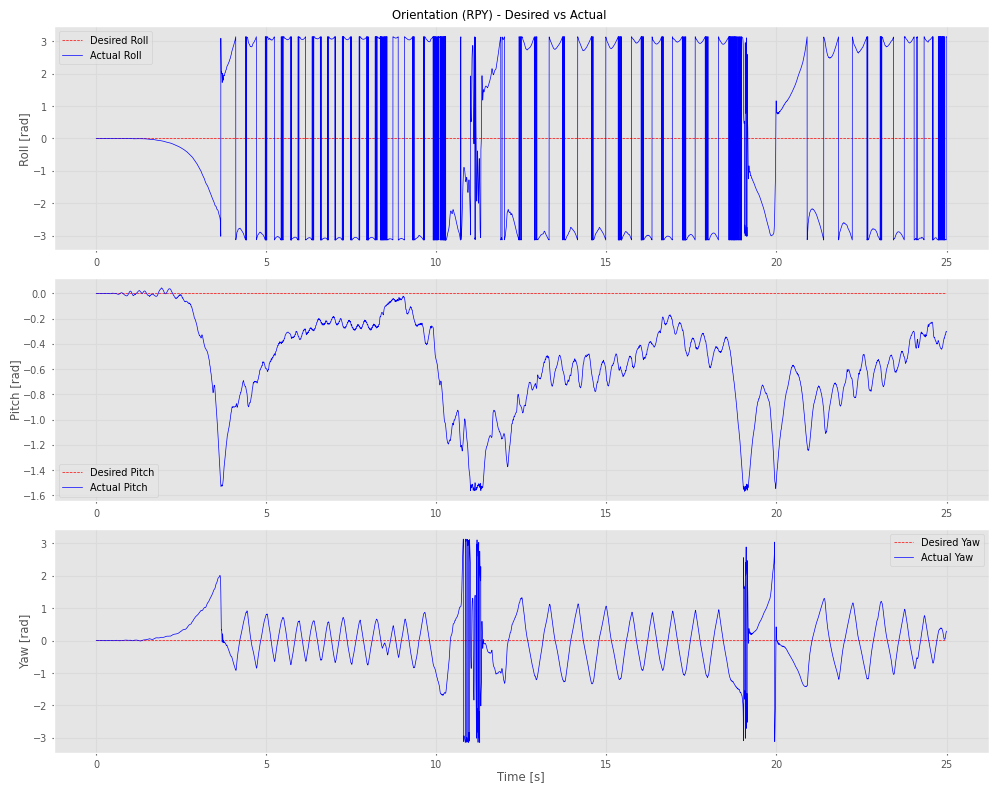

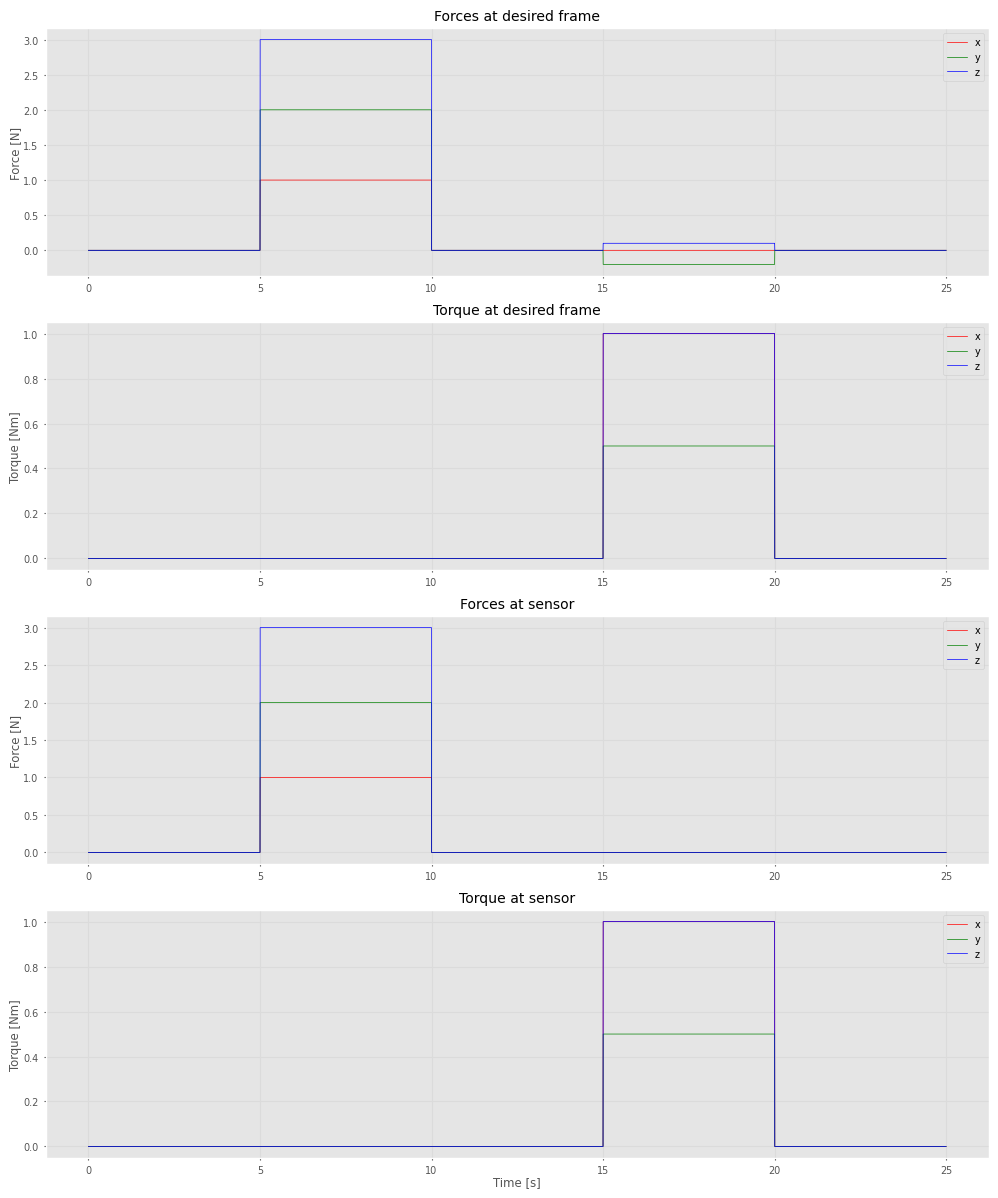

In [ ]:

# ------------------------------------------------------------------
# Plotting Results
# ------------------------------------------------------------------
# Convert time log to numpy array.
time_log = np.array(time_log)


fig, axs = plt.subplots(3, 1, figsize=(10, 8))
trans_labels = ['X', 'Y', 'Z']
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), i], 'r--', label='Desired ' + trans_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), i], 'b-', label='Actual ' + trans_labels[i])
    axs[i].set_ylabel(trans_labels[i] + ' [m]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Cartesian Translation Motion (Desired vs Actual)')
plt.tight_layout()
plt.show()


# Plot Torques (rotational components
rot_labels = ['Roll', 'Pitch', 'Yaw']
#f_all, mu_d_all, f_all_sensor, mu_d_all_sensor
# Plot Orientation (RPY) Desired vs Actual
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), 3+i], 'r--', label='Desired ' + rot_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), 3+i], 'b-', label='Actual ' + rot_labels[i])
    axs[i].set_ylabel(rot_labels[i] + ' [rad]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Orientation (RPY) - Desired vs Actual')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# 1) Forces at desired frame (f_all)
axs[0].plot(time_log, f_all[:, 0], 'r', label='x')
axs[0].plot(time_log, f_all[:, 1], 'g', label='y')
axs[0].plot(time_log, f_all[:, 2], 'b', label='z')
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylabel('Force [N]')
axs[0].set_title('Forces at desired frame')

# 2) Torque at desired frame (mu_all)
axs[1].plot(time_log, mu_all[:, 0], 'r', label='x')
axs[1].plot(time_log, mu_all[:, 1], 'g', label='y')
axs[1].plot(time_log, mu_all[:, 2], 'b', label='z')
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylabel('Torque [Nm]')
axs[1].set_title('Torque at desired frame')

# 3) Forces at sensor (f_all_sensor)
axs[2].plot(time_log, f_all_sensor[:, 0], 'r', label='x')
axs[2].plot(time_log, f_all_sensor[:, 1], 'g', label='y')
axs[2].plot(time_log, f_all_sensor[:, 2], 'b', label='z')
axs[2].legend()
axs[2].grid(True)
axs[2].set_ylabel('Force [N]')
axs[2].set_title('Forces at sensor')

# 4) Torque at sensor (mu_all_sensor)
axs[3].plot(time_log, mu_all_sensor[:, 0], 'r', label='x')
axs[3].plot(time_log, mu_all_sensor[:, 1], 'g', label='y')
axs[3].plot(time_log, mu_all_sensor[:, 2], 'b', label='z')
axs[3].legend()
axs[3].grid(True)
axs[3].set_ylabel('Torque [Nm]')
axs[3].set_xlabel('Time [s]')
axs[3].set_title('Torque at sensor')

plt.tight_layout()
plt.show()



# Impedance

In [33]:
import numpy as np
import mujoco
from tqdm import tqdm

# -------------------------------
# Impedance Control Parameters
# -------------------------------
# Define impedance gains (for a critically damped system)
STIFFNESS = np.array([1000, 1000, 1000, 20, 20, 20])
DAMPING = np.array([500, 500, 500, 200, 200, 200])
#DAMPING = 2 * np.sqrt(STIFFNESS)  # critical damping

# -------------------------------
# Simulation Parameters
# -------------------------------
duration = 25  # seconds, for the impedance demonstration
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
print("Stepsize:", stepsize)
print("Number of steps:", n_steps)
frames = []
framerate = 30   # Hz
time_log = []
# Preallocate logging arrays (6D: [x,y,z, roll,pitch,yaw])
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy  = np.zeros((n_steps, 6))
velocities        = np.zeros((n_steps, 6))
forces            = np.zeros((n_steps, 6))  # computed wrench
torques           = np.zeros((n_steps, 6))
target_positions  = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
time_vals         = np.zeros(n_steps)

# -------------------------------
# Desired Cartesian Trajectory
# -------------------------------

# (Note: In this impedance controller we use p_des, dp_des, ddp_des for the desired trajectory.)
p_des = np.zeros((n_steps, 6))    # desired pose: [x, y, z, roll, pitch, yaw]
dp_des = np.zeros((n_steps, 6))
ddp_des = np.zeros((n_steps, 6))
for i in range(n_steps):
    t = i * stepsize
    # Compute desired translation (in meters)
    x_des = 0.3 * np.sin(t/3) - 0.1
    y_des = 0.3 * np.sin(t/3) * np.cos(t/3) - 0.3
    z_des = 0.1 * np.sin(t) + 0.5
    des_trans = np.array([x_des, y_des, z_des])
    des_orient = np.zeros(3)  # fixed orientation (zero roll, pitch, yaw)
    p_des[i, :] = np.concatenate((des_trans, des_orient))
    
    # Compute desired velocity and acceleration (translation only)
    dx_des = 0.3 * (1/3) * np.cos(t/3)
    ddx_des = -0.3 * (1/3)**2 * np.sin(t/3)
    dy_des = 0.15 * (2/3) * np.cos(2*t/3)
    ddy_des = -0.15 * (2/3)**2 * np.sin(2*t/3)
    dz_des = 0.1 * np.cos(t)
    ddz_des = -0.1 * np.sin(t)
    dp_des[i, :] = np.concatenate(([dx_des, dy_des, dz_des], np.zeros(3)))
    ddp_des[i, :] = np.concatenate(([ddx_des, ddy_des, ddz_des], np.zeros(3)))
    
# -------------------------------
# Reset and Initialize Simulation
# -------------------------------
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q  # Using your IK solution (sol.q) for initial configuration
mujoco.mj_forward(ur5e.m, ur5e.d)

# -------------------------------
# Main Simulation Loop (Impedance Controller)
# -------------------------------
progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    t_current = ur5e.d.time
    
    # 1. Get current Cartesian state from forward kinematics
    tcp_pos = ur5e.fkine(ur5e.d.qpos)   # tcp_pos.t: position, tcp_pos.rpy(order='xyz'): orientation
    J = ur5e.jacob0(ur5e.d.qpos)        # Cartesian Jacobian (6 x nv)
    v_act = J @ ur5e.d.qvel             # Actual Cartesian velocity
    
    # 2. Compute current Cartesian pose (6D) from tcp_pos
    p_act = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    
    # 3. Compute tracking errors (desired minus actual)
    error = p_des[idx] - p_act          # Position & orientation error
    error_dot = dp_des[idx] - v_act     # Velocity error
    
    # 4. Compute desired wrench from impedance law (feedforward ddp can be added if desired)
    # Here: wrench = K_imp * error + D_imp * error_dot
    wrench = STIFFNESS * error + DAMPING * error_dot + get_external_wrench(t_current)
    # (Optionally add feedforward: + M_imp*ddp_des[idx] )
    
    # 5. Map the Cartesian wrench to joint torques via the Jacobian transpose
    tau = J.T @ wrench
    
    # 6. Add dynamic compensation (mass matrix and coriolis forces)
    mass_matrix = np.zeros((ur5e.m.nv, ur5e.m.nv))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # 7. Apply the computed torques
    ur5e.d.ctrl[:] = tau
    
    # 8. Log data
    time_vals[idx] = t_current
    target_positions[idx] = p_des[idx]
    target_velocities[idx] = dp_des[idx]
    positions_as_rpy[idx] = np.concatenate((tcp_pos.t, tcp_pos.rpy(order='xyz')))
    velocities[idx] = v_act
    forces[idx] = wrench  # the computed 6D wrench
    torques[idx] = tau
    time_log.append(t_current)

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # 9. Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# (Optional: video capture and further logging can be added)
if showVideo:
    media.show_video(frames, fps=framerate)

Stepsize: 0.002
Number of steps: 12500


100%|█████████▉| 24.999999999997023/25 [00:17<00:00,  1.43it/s] 


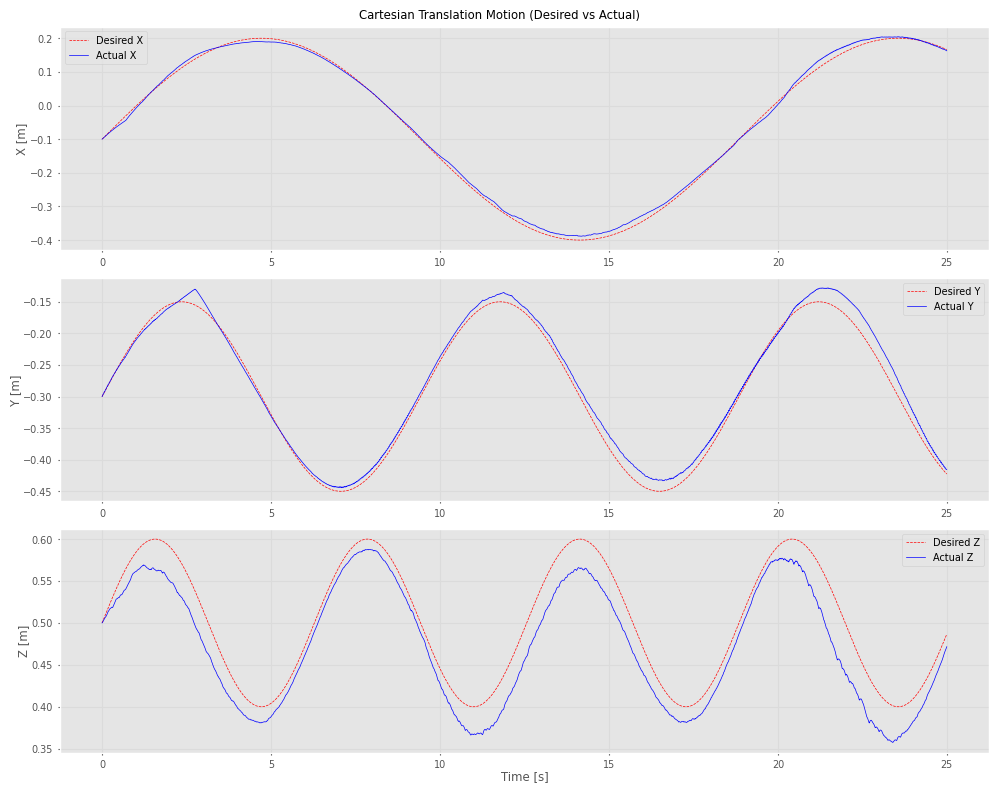

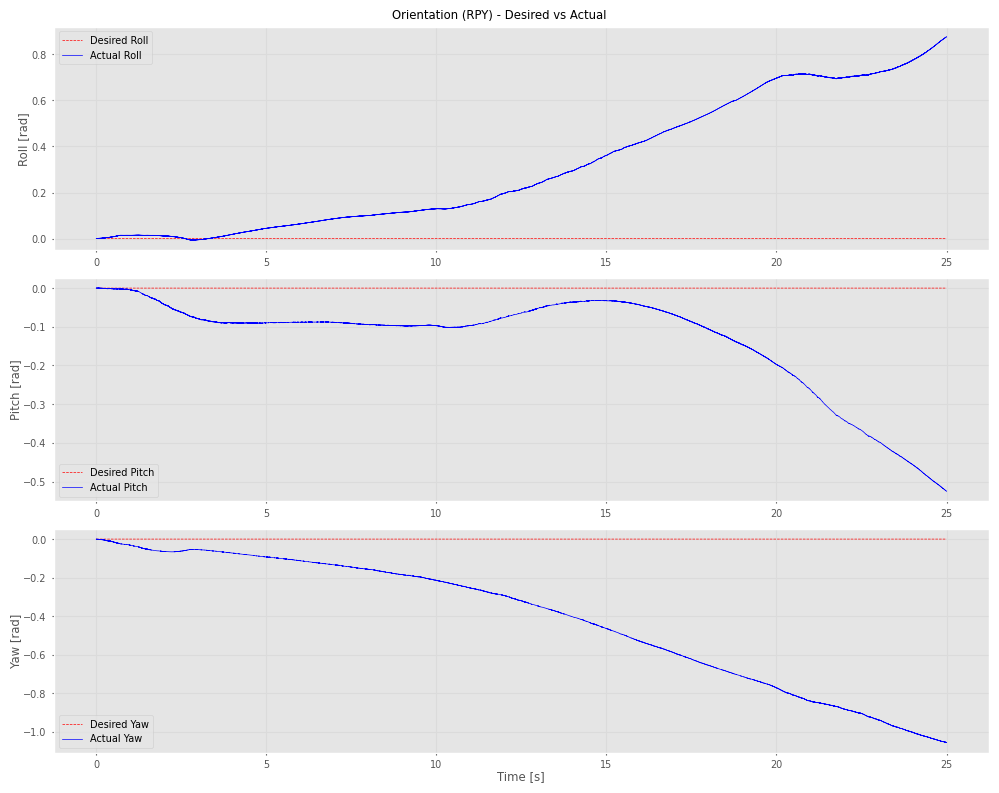

<Figure size 640x480 with 0 Axes>

In [35]:

# ------------------------------------------------------------------
# Plotting Results
# ------------------------------------------------------------------
# Convert time log to numpy array.
time_log = np.array(time_log)


fig, axs = plt.subplots(3, 1, figsize=(10, 8))
trans_labels = ['X', 'Y', 'Z']
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), i], 'r--', label='Desired ' + trans_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), i], 'b-', label='Actual ' + trans_labels[i])
    axs[i].set_ylabel(trans_labels[i] + ' [m]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Cartesian Translation Motion (Desired vs Actual)')
plt.tight_layout()
plt.show()


# Plot Torques (rotational components
rot_labels = ['Roll', 'Pitch', 'Yaw']
#f_all, mu_d_all, f_all_sensor, mu_d_all_sensor
# Plot Orientation (RPY) Desired vs Actual
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i in range(3):
    axs[i].plot(time_log, p_des[:len(time_log), 3+i], 'r--', label='Desired ' + rot_labels[i])
    axs[i].plot(time_log, positions_as_rpy[:len(time_log), 3+i], 'b-', label='Actual ' + rot_labels[i])
    axs[i].set_ylabel(rot_labels[i] + ' [rad]')
    axs[i].legend()
    axs[i].grid(True)
axs[-1].set_xlabel('Time [s]')
fig.suptitle('Orientation (RPY) - Desired vs Actual')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

